In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-dataset/Coffee_production.csv
/kaggle/input/coffee-dataset/Coffee_importers_consumption.csv
/kaggle/input/coffee-dataset/Coffee_re_export.csv
/kaggle/input/coffee-dataset/Coffee_domestic_consumption.csv
/kaggle/input/coffee-dataset/Coffee_import.csv
/kaggle/input/coffee-dataset/Coffee_green_coffee_inventorie.csv
/kaggle/input/coffee-dataset/Coffee_export.csv


In [116]:
# read datasets
domestic_consumption = pd.read_csv('/kaggle/input/coffee-dataset/Coffee_domestic_consumption.csv')
coffee_export = pd.read_csv('/kaggle/input/coffee-dataset/Coffee_export.csv')
coffee_import = pd.read_csv('/kaggle/input/coffee-dataset/Coffee_import.csv')
coffee_production = pd.read_csv('/kaggle/input/coffee-dataset/Coffee_production.csv')

# **Analysis of coffee production**

## Production dataset basic information

In [117]:
coffee_production.head(5)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09


In [118]:
coffee_production.shape

(55, 33)

In [59]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           55 non-null     object 
 1   Coffee type       55 non-null     object 
 2   1990/91           55 non-null     float64
 3   1991/92           55 non-null     float64
 4   1992/93           55 non-null     float64
 5   1993/94           55 non-null     float64
 6   1994/95           55 non-null     float64
 7   1995/96           55 non-null     float64
 8   1996/97           55 non-null     float64
 9   1997/98           55 non-null     float64
 10  1998/99           55 non-null     float64
 11  1999/00           55 non-null     float64
 12  2000/01           55 non-null     float64
 13  2001/02           55 non-null     float64
 14  2002/03           55 non-null     float64
 15  2003/04           55 non-null     float64
 16  2004/05           55 non-null     float64
 17 

In [60]:
coffee_production.describe()

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1.017055e+08,1.104753e+08,1.074775e+08,1.001007e+08,1.017971e+08,9.525927e+07,1.127029e+08,1.089676e+08,1.187629e+08,1.433280e+08,...,1.541749e+08,1.649280e+08,1.679007e+08,1.639625e+08,1.703193e+08,1.770742e+08,1.785742e+08,1.881415e+08,1.800578e+08,4.104269e+09
std,2.510875e+08,2.668466e+08,3.022180e+08,2.489344e+08,2.510328e+08,1.858680e+08,2.602192e+08,2.430145e+08,3.142337e+08,4.012591e+08,...,4.469919e+08,4.931417e+08,5.030529e+08,4.918727e+08,5.059698e+08,5.225472e+08,5.135587e+08,5.851111e+08,5.390922e+08,1.112550e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.080000e+06
25%,2.430000e+06,3.900000e+06,2.640000e+06,2.130000e+06,2.610000e+06,2.610000e+06,2.340000e+06,2.880000e+06,3.480000e+06,3.540000e+06,...,1.980000e+06,1.710000e+06,2.010000e+06,2.250000e+06,2.310000e+06,1.890000e+06,2.160000e+06,2.190000e+06,2.280000e+06,8.199000e+07
50%,2.766000e+07,2.778000e+07,3.000000e+07,2.652000e+07,2.436000e+07,2.604000e+07,2.406000e+07,1.800000e+07,2.634000e+07,2.184000e+07,...,2.094000e+07,2.004000e+07,1.548000e+07,1.488000e+07,1.758000e+07,1.620000e+07,1.584000e+07,1.860000e+07,1.842000e+07,6.236400e+08
75%,9.216000e+07,9.720000e+07,9.234000e+07,9.486000e+07,1.153200e+08,1.127700e+08,1.139700e+08,9.669000e+07,1.076700e+08,1.211700e+08,...,9.735000e+07,9.189000e+07,7.185000e+07,6.960000e+07,6.657000e+07,6.864000e+07,7.053000e+07,7.806000e+07,7.194000e+07,2.785140e+09
max,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,2.205660e+09,2.854680e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10


## **Top twenty countries in terms of total production**

In [119]:
production_country = coffee_production[['Country','Total_production','Coffee type']]
production_country = production_country.set_index('Country').sort_values('Total_production',ascending=False)
top_twenty = production_country.head(20)
top_twenty

,Total_production,Coffee type
Country,,
Brazil,7.508298e+10,Arabica/Robusta
Viet Nam,2.880318e+10,Robusta/Arabica
Colombia,2.159862e+10,Arabica
Indonesia,1.540488e+10,Robusta/Arabica
Ethiopia,8.669520e+09,Arabica
India,8.222220e+09,Robusta/Arabica
Mexico,7.853520e+09,Arabica/Robusta
Guatemala,7.020540e+09,Arabica/Robusta
Honduras,6.672720e+09,Arabica


Text(0, 0.5, 'Total Production')

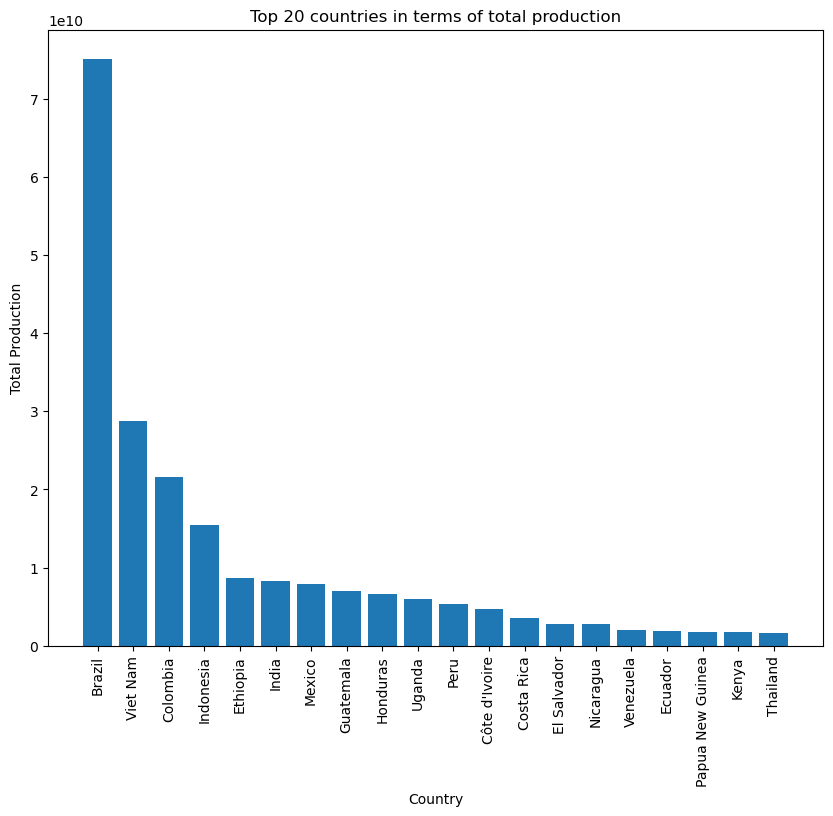

In [120]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.bar(top_twenty.index,top_twenty['Total_production'],align =  'center')
plt.title('Top 20 countries in terms of total production')
plt.xlabel('Country')
plt.ylabel('Total Production')

<font size = 3>**From the above graph, we can find the first four countries' total production far exceeds that of other countries, so I will focus my analysis on these countries.**

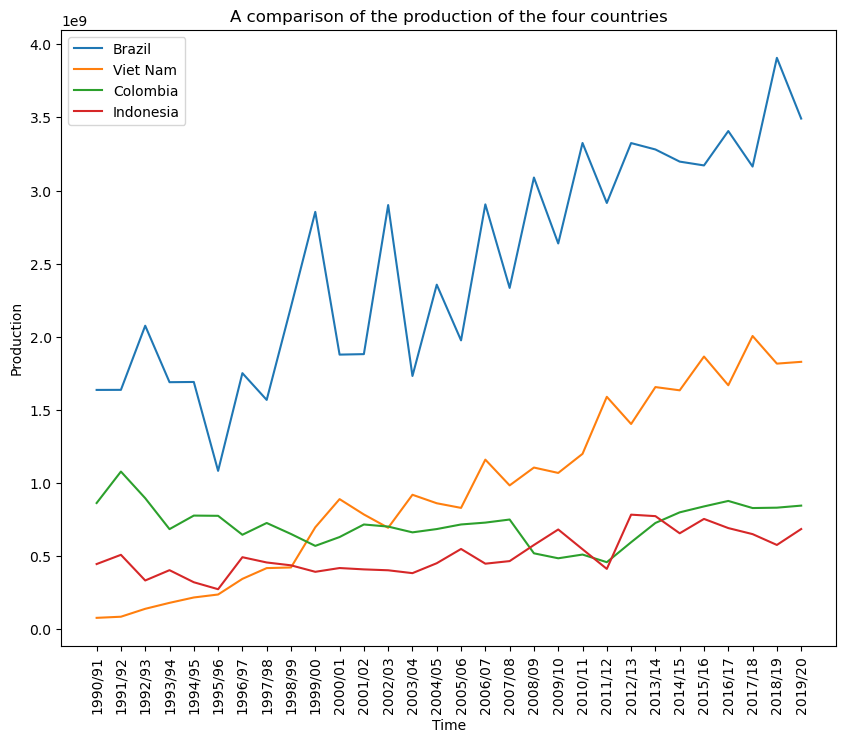

In [121]:
brazil = coffee_production[coffee_production['Country']== 'Brazil']
vietnam = coffee_production[coffee_production['Country']== 'Viet Nam']
colombia = coffee_production[coffee_production['Country']== 'Colombia']
indonesia = coffee_production[coffee_production['Country']== 'Indonesia']

fig,ax = plt.subplots()


plt.xticks(rotation = 90)
ax.plot(brazil.iloc[0,2:len(brazil.columns)-1], label = 'Brazil')
ax.plot(vietnam.iloc[0,2:len(vietnam.columns)-1], label = 'Viet Nam')
ax.plot(colombia.iloc[0,2:len(colombia.columns)-1], label = 'Colombia')
ax.plot(indonesia.iloc[0,2:len(indonesia.columns)-1], label = 'Indonesia')

ax.set_title('A comparison of the production of the four countries')
ax.set_xlabel('Time')
ax.set_ylabel('Production')
ax.legend()

<font size = 3>**From this graph we can see that Brazil always has the highest production regardless of the period. Vietnam's production was the lowest until 1999, but since 1999 it has been increasing year by year to become the second largest coffee producer.**

<font size = 3>**By reviewing the information, I found that in the 1980s, Vietnam, which ended the Vietnam War, started comprehensive economic construction. Considering Vietnam's own climate, nutrient-rich basalt laterite soil resources and a large amount of cheap labor, the government wisely chose Robusta coffee beans as the main production species and vigorously developed the coffee plantation industry. So since 1999, Vietnam has replaced Colombia as the second largest coffee producing country.**

## **Analysis of coffee production according to coffee type**

### **Analysis of the top 20 countries in terms of total production**

In [122]:
coffee_production['Coffee type'].value_counts()

Arabica            22
Robusta            15
Robusta/Arabica    10
Arabica/Robusta     8
Name: Coffee type, dtype: int64

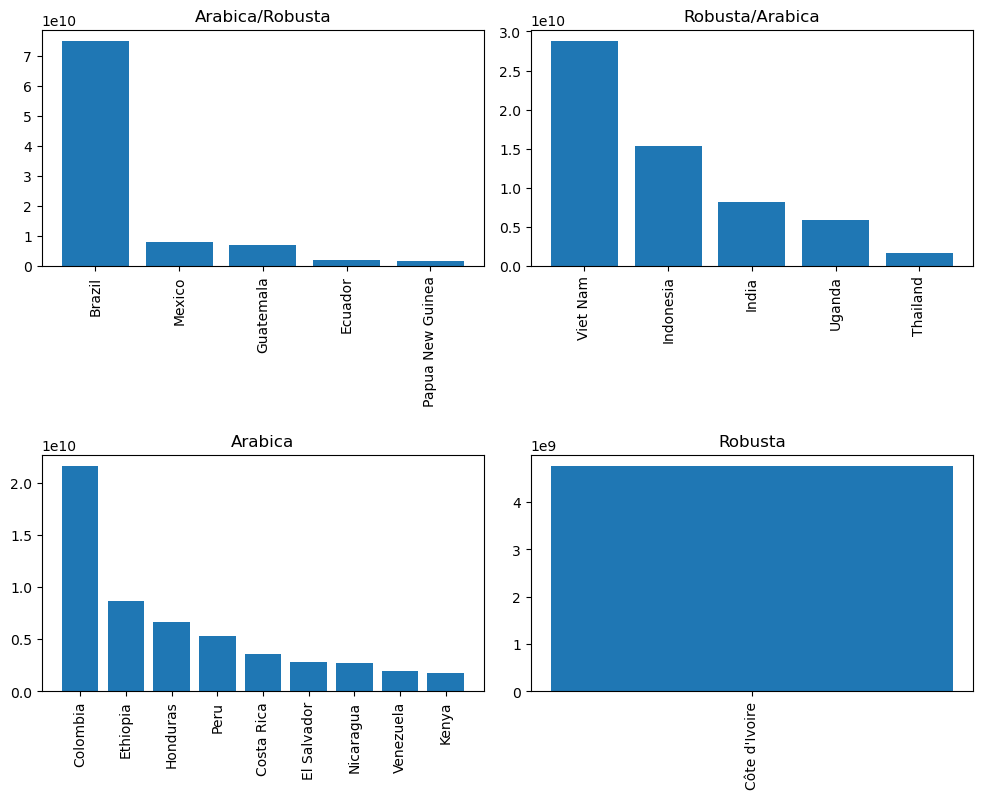

In [123]:
categories = ['Arabica/Robusta', 'Robusta/Arabica', 'Arabica', 'Robusta']
positions = [1,2,3,4]


for category,position in zip(categories, positions):
    t = top_twenty.groupby('Coffee type').get_group(category)
    plt.subplot(2, 2, position)
    plt.xticks(rotation=90)
    plt.tight_layout(h_pad = 2) 
    plt.bar(top_twenty[top_twenty['Coffee type'] == category].index,
            top_twenty[top_twenty['Coffee type'] == category]['Total_production'],align =  'center')
    plt.title(category)
        

<font size = 3>**As you can see from the chart above. I conclude four points.
First, among the countries that produce Arabica/Robusta, Brazil produces the most. 
Second, of the countries producing Robusta/Arabica, Vietnam produces the most.
Third, among the countries that produce only Arabica, Colombia produces the most.
Fourth, of the top 20 countries with the highest total production, only Côte d'Ivoire produces only Robusta.**

### **Analysis of the top 5 countries for each type of coffee production**

In [124]:
robusta = coffee_production[['Country', 'Total_production', 'Coffee type']].sort_values(by=['Total_production'], ascending=False)
robusta.head()
robusta.drop(robusta.loc[robusta['Coffee type']=='Arabica/Robusta'].index, inplace=True)
robusta.drop(robusta.loc[robusta['Coffee type']=='Robusta/Arabica'].index, inplace=True)
robusta.drop(robusta.loc[robusta['Coffee type']=='Arabica'].index, inplace=True)
robusta = robusta.head(5)
print('Top 5 Countries Producing Robusta Coffee: ')
robusta.head()

Top 5 Countries Producing Robusta Coffee: 


,Country,Total_production,Coffee type
25,Côte d'Ivoire,4.761420e+09,Robusta
6,Madagascar,1.045560e+09,Robusta
39,Lao People's Democratic Republic,5.680800e+08,Robusta
33,Guinea,4.824600e+08,Robusta
49,Togo,2.814000e+08,Robusta


In [125]:
arabica = coffee_production[['Country', 'Total_production', 'Coffee type']].sort_values(by=['Total_production'], ascending=False)
arabica.drop(arabica.loc[arabica['Coffee type']=='Arabica/Robusta'].index, inplace=True)
arabica.drop(arabica.loc[arabica['Coffee type']=='Robusta/Arabica'].index, inplace=True)
arabica.drop(arabica.loc[arabica['Coffee type']=='Robusta'].index, inplace=True)
arabica = arabica.head(5)
print('Top 5 Countries Producing Arabica Coffee: ')
arabica.head()

Top 5 Countries Producing Arabica Coffee: 


,Country,Total_production,Coffee type
23,Colombia,2.159862e+10,Arabica
29,Ethiopia,8.669520e+09,Arabica
35,Honduras,6.672720e+09,Arabica
10,Peru,5.317620e+09,Arabica
24,Costa Rica,3.596700e+09,Arabica


In [126]:
araro = coffee_production[['Country', 'Total_production', 'Coffee type']].sort_values(by=['Total_production'], ascending=False)
araro.drop(araro.loc[araro['Coffee type']=='Arabica'].index, inplace=True)
araro.drop(araro.loc[araro['Coffee type']=='Robusta/Arabica'].index, inplace=True)
araro.drop(araro.loc[araro['Coffee type']=='Robusta'].index, inplace=True)
araro = araro.head(5)
print('Top 5 Countries Producing Arabica/Robusta Coffee: ')
araro.head(5)

Top 5 Countries Producing Arabica/Robusta Coffee: 


,Country,Total_production,Coffee type
2,Brazil,7.508298e+10,Arabica/Robusta
41,Mexico,7.853520e+09,Arabica/Robusta
32,Guatemala,7.020540e+09,Arabica/Robusta
4,Ecuador,1.900380e+09,Arabica/Robusta
8,Papua New Guinea,1.803120e+09,Arabica/Robusta


In [127]:
roara = coffee_production[['Country', 'Total_production', 'Coffee type']].sort_values(by=['Total_production'], ascending=False)
roara.drop(roara.loc[roara['Coffee type']=='Arabica/Robusta'].index, inplace=True)
roara.drop(roara.loc[roara['Coffee type']=='Arabica'].index, inplace=True)
roara.drop(roara.loc[roara['Coffee type']=='Robusta'].index, inplace=True)
roara = roara.head(5)
print('Top 5 Countries Producing Robusta/Arabica Coffee: ')
roara.head(5)

Top 5 Countries Producing Robusta/Arabica Coffee: 


,Country,Total_production,Coffee type
53,Viet Nam,2.880318e+10,Robusta/Arabica
5,Indonesia,1.540488e+10,Robusta/Arabica
36,India,8.222220e+09,Robusta/Arabica
51,Uganda,5.919480e+09,Robusta/Arabica
48,Thailand,1.674000e+09,Robusta/Arabica


Text(0.5, 1.0, 'Robusta/Arabica')

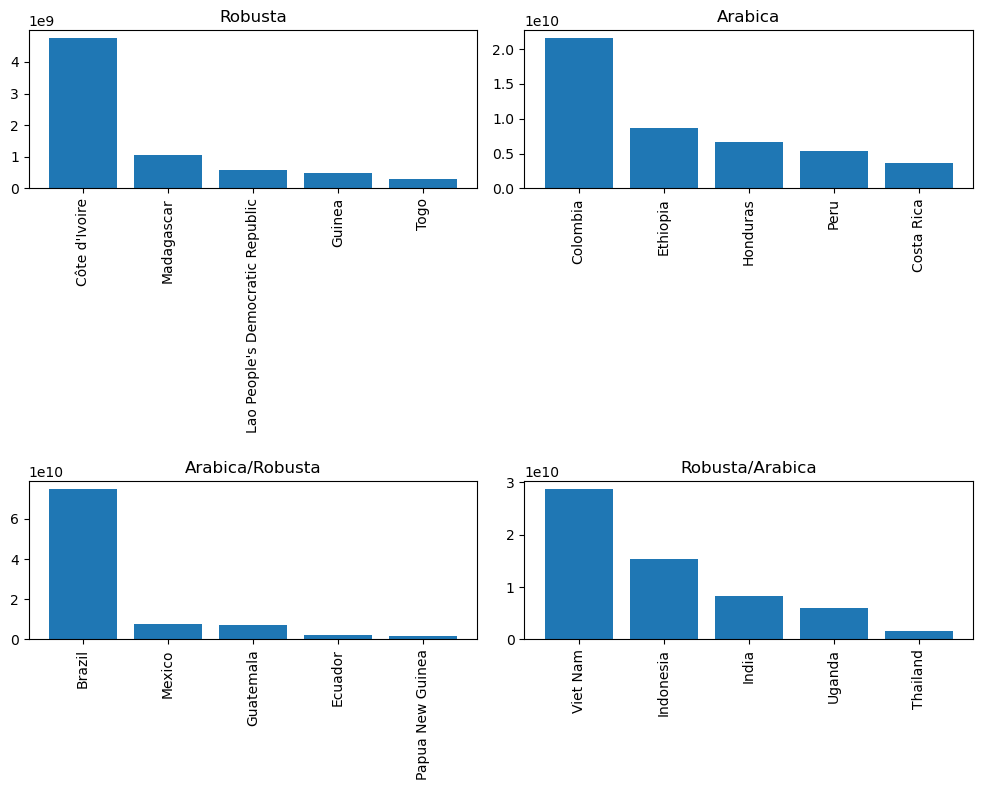

In [128]:
plt.subplot(2,  2,  1)
plt.xticks(rotation=90)
plt.tight_layout(h_pad = 2) 
plt.bar(robusta['Country'], robusta['Total_production'],align =  'center')
plt.title('Robusta')

plt.subplot(2,  2,  2)
plt.xticks(rotation=90)
plt.tight_layout(h_pad = 2) 
plt.bar(arabica['Country'], arabica['Total_production'],align =  'center')
plt.title('Arabica')

plt.subplot(2,  2,  3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad = 2) 
plt.bar(araro['Country'], araro['Total_production'],align =  'center')
plt.title('Arabica/Robusta')

plt.subplot(2,  2,  4)
plt.xticks(rotation=90)
plt.tight_layout(h_pad = 2) 
plt.bar(roara['Country'], roara['Total_production'],align =  'center')
plt.title('Robusta/Arabica')

<font size = 3>**As you can see from the chart above. First, among the countries that produce only Robusta, Côte d'Ivoire produces much more than the others. Secondly, among the countries that produce only Arabica, Colombia produces much more than the others. Third, among the countries producing Arabica/Robusta, Brazil's production far exceeds that of the others. Fourth, among the countries producing Robusta/Arabica, Vietnam's production far exceeds that of other countries.**

# **Analysis of domestic consumption**

## Consumption dataset basic information

In [129]:
domestic_consumption.head(5)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [130]:
domestic_consumption.shape

(55, 33)

In [73]:
domestic_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02                     55 non-null     int64 
 

In [131]:
domestic_consumption.describe()

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,2.128278e+07,2.206701e+07,2.285613e+07,2.301590e+07,2.330200e+07,2.465735e+07,2.565010e+07,2.647750e+07,2.739992e+07,2.808131e+07,...,4.711907e+07,4.871183e+07,4.944423e+07,5.069858e+07,5.165367e+07,5.272819e+07,5.420271e+07,5.481235e+07,5.452530e+07,1.112487e+09
std,6.810062e+07,7.032839e+07,7.363077e+07,7.511769e+07,7.679945e+07,8.321743e+07,9.039443e+07,9.438905e+07,9.995154e+07,1.040782e+08,...,1.634943e+08,1.687185e+08,1.676074e+08,1.701179e+08,1.719262e+08,1.777393e+08,1.840522e+08,1.858924e+08,1.844917e+08,3.834783e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e+05,1.800000e+05,1.800000e+05,2.400000e+05,2.400000e+05,2.400000e+05,1.800000e+05,1.800000e+05,2.100000e+05,2.100000e+05,...,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,9.586920e+06
50%,2.040000e+06,3.000000e+06,3.000000e+06,2.400000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,4.020000e+06,4.302000e+06,4.408020e+06,4.519020e+06,4.560000e+06,4.620000e+06,4.680000e+06,4.200000e+06,4.290000e+06,1.216200e+08
75%,1.299000e+07,1.671300e+07,1.650000e+07,1.731000e+07,1.650000e+07,1.775535e+07,1.792548e+07,1.800000e+07,1.800000e+07,1.590000e+07,...,2.070000e+07,2.115000e+07,2.070000e+07,2.205000e+07,2.205000e+07,2.100000e+07,2.155002e+07,2.220000e+07,2.106000e+07,5.897930e+08
max,4.920000e+08,5.100000e+08,5.340000e+08,5.460000e+08,5.580000e+08,6.060000e+08,6.600000e+08,6.900000e+08,7.320000e+08,7.620000e+08,...,1.183200e+09,1.219800e+09,1.205100e+09,1.219980e+09,1.230480e+09,1.273500e+09,1.319820e+09,1.332000e+09,1.320000e+09,2.782470e+10


## **Top twenty countries in terms of total consumption**

In [132]:
consumption_country = domestic_consumption[['Country','Coffee type','Total_domestic_consumption']]
consumption_country = domestic_consumption.set_index('Country').sort_values('Total_domestic_consumption',ascending=False)
top_twentys = consumption_country.head(20)
top_twentys

,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,732000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
Indonesia,Robusta/Arabica,74520000,76800000,79140000,81540000,84000000,86580000,89160000,91920000,94680000,...,220020000,234000000,255000000,265020000,273000000,279000000,285000000,288000000,288360000,4920480000
Ethiopia,Arabica,72000000,75840000,79860000,84120000,88560000,93300000,98220000,103440000,108960000,...,194100000,197940000,201900000,205980000,210060000,214260000,218580000,221100000,226860000,4536540000
Mexico,Arabica/Robusta,82440000,72000000,78000000,64200000,61200000,70740000,74100000,72060000,66480000,...,141240000,141240000,139260000,140820000,139740000,141600000,144000000,147000000,145500000,3189660000
Philippines,Robusta/Arabica,43200000,45000000,45000000,46200000,47400000,48600000,49860000,51180000,48600000,...,130500000,139500000,153000000,168000000,180000000,181800000,190800000,198000000,195000000,2807280000
Colombia,Arabica,74100000,76140000,78180000,80340000,82500000,81540000,80580000,79680000,78720000,...,86103900,90854520,97021200,99927060,103222380,104186484,107596260,107484600,121486440,2536776384
Venezuela,Arabica,46943400,48928800,50998200,53155800,55404000,57747600,60190800,62736599,65390400,...,99000000,99000000,99000000,99000000,99000000,99000000,96000000,93000000,76500000,2386067999
India,Robusta/Arabica,54180000,55000020,55020000,49999980,50100000,50220000,50280000,50340000,54000000,...,79500000,82500000,84000000,85800000,87000000,86400000,88200000,88500000,87000000,2093460000
Viet Nam,Robusta/Arabica,9000000,13800000,15000000,16020000,16020000,16910700,17850960,18843480,19891140,...,99000000,109500000,120000000,132000000,138000000,144000000,150000000,156000000,159000000,1920928320


Text(0, 0.5, 'Total consumption')

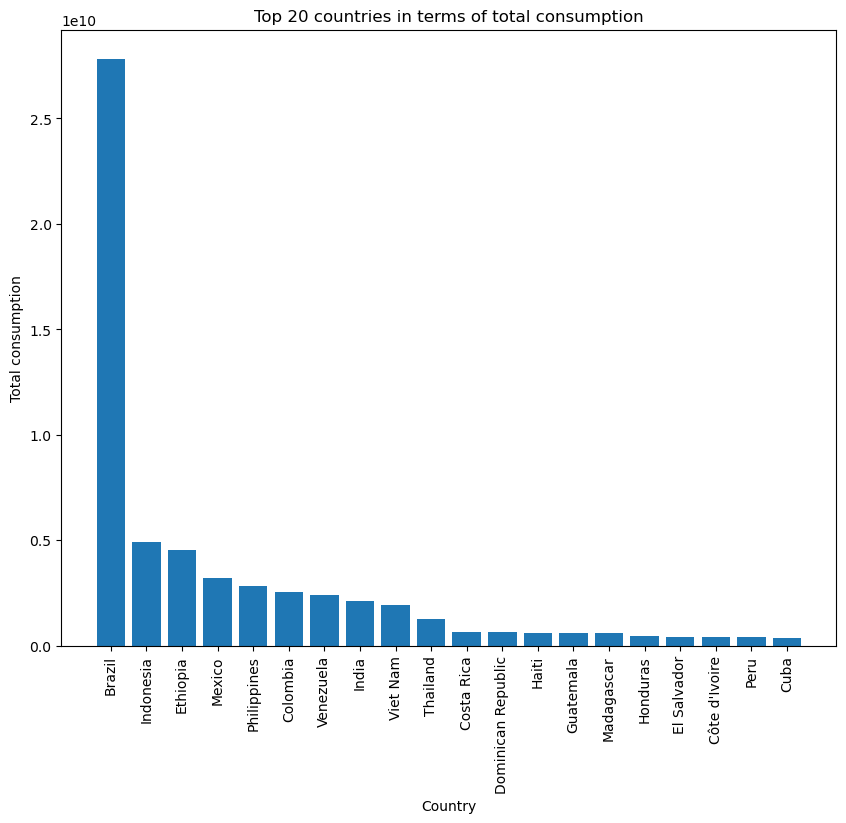

In [133]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.bar(top_twentys.index,top_twentys['Total_domestic_consumption'],align =  'center')
plt.title('Top 20 countries in terms of total consumption')
plt.xlabel('Country')
plt.ylabel('Total consumption')

<font size = 3>**As we can see from the chart above, Brazil consumes far more coffee than any other country.**

## **Analysis of coffee consumption according to coffee type**

### **Analysis of the top 20 countries in terms of total consumption**

In [134]:
domestic_consumption['Coffee type'].value_counts()

Arabica            22
Robusta            15
Robusta/Arabica    10
Arabica/Robusta     8
Name: Coffee type, dtype: int64

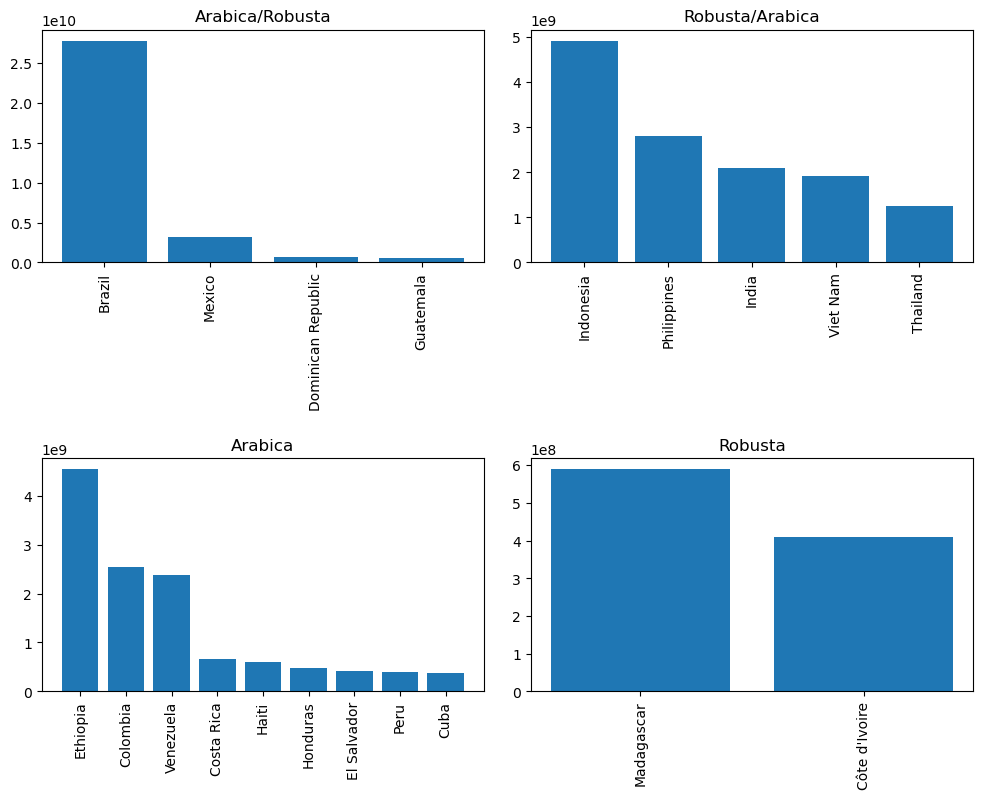

In [135]:
categories = ['Arabica/Robusta', 'Robusta/Arabica', 'Arabica', 'Robusta']
positions = [1,2,3,4]


for category,position in zip(categories, positions):
    t = top_twentys.groupby('Coffee type').get_group(category)
    plt.subplot(2, 2, position)
    plt.xticks(rotation=90)
    plt.tight_layout(h_pad = 2) 
    plt.bar(top_twentys[top_twentys['Coffee type'] == category].index,
            top_twentys[top_twentys['Coffee type'] == category]['Total_domestic_consumption'],align =  'center')
    plt.title(category)

<font size = 3>**As we can see from the chart above. Firstly, among those countries that consume Arabica/Robusta, Brazil's total consumption is much higher than the others. Secondly, among those countries that consume Robusta/Arabica, Indonesia's consumption is much higher than others. Third, among those countries that consume Arabica only, Ethiopia far exceeds the two countries behind it, but the consumption of the first three countries far exceeds the others. Fourth, among countries consuming only Robusta, the difference in consumption between Madagascar and Côte d'Ivoire is not as pronounced as in the other three types of countries.**

### **Analysis of the top 5 countries for each type of coffee consumption**

In [136]:
robusta = domestic_consumption[['Country', 'Total_domestic_consumption', 'Coffee type']].sort_values(by=['Total_domestic_consumption'], ascending=False)
robusta.head()
robusta.drop(robusta.loc[robusta['Coffee type']=='Arabica/Robusta'].index, inplace=True)
robusta.drop(robusta.loc[robusta['Coffee type']=='Robusta/Arabica'].index, inplace=True)
robusta.drop(robusta.loc[robusta['Coffee type']=='Arabica'].index, inplace=True)
robusta = robusta.head(5)
print('Top 5 Countries Consuming Robusta Coffee: ')
robusta.head()

Top 5 Countries Consuming Robusta Coffee: 


,Country,Total_domestic_consumption,Coffee type
6,Madagascar,588705960,Robusta
25,Côte d'Ivoire,410260140,Robusta
39,Lao People's Democratic Republic,157980000,Robusta
33,Guinea,86730000,Robusta
44,Nigeria,70740000,Robusta


In [137]:
arabica = domestic_consumption[['Country', 'Total_domestic_consumption', 'Coffee type']].sort_values(by=['Total_domestic_consumption'], ascending=False)
arabica.drop(arabica.loc[arabica['Coffee type']=='Arabica/Robusta'].index, inplace=True)
arabica.drop(arabica.loc[arabica['Coffee type']=='Robusta/Arabica'].index, inplace=True)
arabica.drop(arabica.loc[arabica['Coffee type']=='Robusta'].index, inplace=True)
arabica = arabica.head(5)
print('Top 5 Countries Consuming Arabica Coffee: ')
arabica.head()

Top 5 Countries Consuming Arabica Coffee: 


,Country,Total_domestic_consumption,Coffee type
29,Ethiopia,4536540000,Arabica
23,Colombia,2536776384,Arabica
52,Venezuela,2386067999,Arabica
24,Costa Rica,665335200,Arabica
17,Haiti,600600000,Arabica


In [138]:
araro = domestic_consumption[['Country', 'Total_domestic_consumption', 'Coffee type']].sort_values(by=['Total_domestic_consumption'], ascending=False)
araro.drop(araro.loc[araro['Coffee type']=='Arabica'].index, inplace=True)
araro.drop(araro.loc[araro['Coffee type']=='Robusta/Arabica'].index, inplace=True)
araro.drop(araro.loc[araro['Coffee type']=='Robusta'].index, inplace=True)
araro = araro.head(5)
print('Top 5 Countries Consuming Arabica/Robusta Coffee: ')
araro.head(5)

Top 5 Countries Consuming Arabica/Robusta Coffee: 


,Country,Total_domestic_consumption,Coffee type
2,Brazil,27824700000,Arabica/Robusta
41,Mexico,3189660000,Arabica/Robusta
16,Dominican Republic,642823380,Arabica/Robusta
32,Guatemala,590880000,Arabica/Robusta
4,Ecuador,381540000,Arabica/Robusta


In [139]:
roara = domestic_consumption[['Country', 'Total_domestic_consumption', 'Coffee type']].sort_values(by=['Total_domestic_consumption'], ascending=False)
roara.drop(roara.loc[roara['Coffee type']=='Arabica/Robusta'].index, inplace=True)
roara.drop(roara.loc[roara['Coffee type']=='Arabica'].index, inplace=True)
roara.drop(roara.loc[roara['Coffee type']=='Robusta'].index, inplace=True)
roara = roara.head(5)
print('Top 5 Countries Consuming Robusta/Arabica Coffee: ')
roara.head(5)

Top 5 Countries Consuming Robusta/Arabica Coffee: 


,Country,Total_domestic_consumption,Coffee type
5,Indonesia,4920480000,Robusta/Arabica
18,Philippines,2807280000,Robusta/Arabica
36,India,2093460000,Robusta/Arabica
53,Viet Nam,1920928320,Robusta/Arabica
48,Thailand,1248600000,Robusta/Arabica


Text(0.5, 1.0, 'Robusta/Arabica')

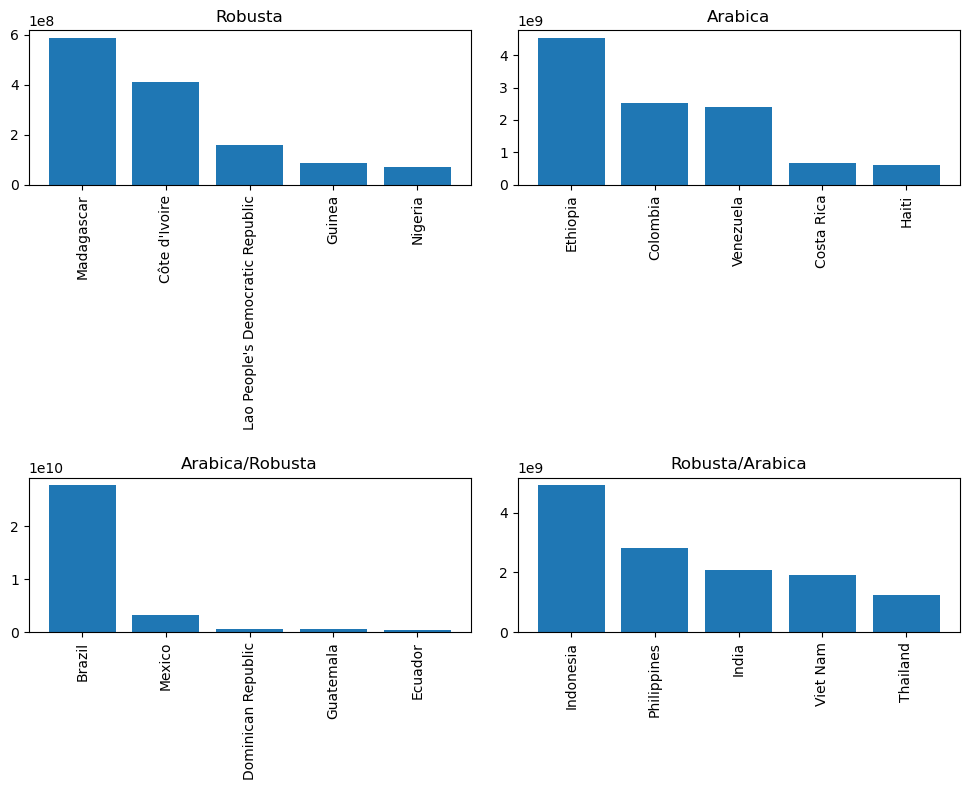

In [140]:
plt.subplot(2,  2,  1)
plt.xticks(rotation=90)
plt.tight_layout(h_pad = 2) 
plt.bar(robusta['Country'], robusta['Total_domestic_consumption'],align =  'center')
plt.title('Robusta')

plt.subplot(2,  2,  2)
plt.xticks(rotation=90)
plt.tight_layout(h_pad = 2) 
plt.bar(arabica['Country'], arabica['Total_domestic_consumption'],align =  'center')
plt.title('Arabica')

plt.subplot(2,  2,  3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad = 2) 
plt.bar(araro['Country'], araro['Total_domestic_consumption'],align =  'center')
plt.title('Arabica/Robusta')

plt.subplot(2,  2,  4)
plt.xticks(rotation=90)
plt.tight_layout(h_pad = 2) 
plt.bar(roara['Country'], roara['Total_domestic_consumption'],align =  'center')
plt.title('Robusta/Arabica')

<font size = 3>**As you can see from the chart above. First, among the countries that consume only Robusta, Madagascar consumes much more than the others. Secondly, among the countries that consume only Arabica, Ethiopia consumes much more than the others. Third, among the countries consuming Arabica/Robusta, Brazil's consumption far exceeds that of the others. Fourth, among the countries consuming Robusta/Arabica, Indonesia's consumption far exceeds that of other countries.**

# **Analysis of export**

## Export dataset basic information

In [141]:
coffee_export.head(5)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,-2147483648,-2147483648,2056140000,1855500000,2138220000,-2147483648,33807709056
3,Burundi,35100000,41280000,38760000,25080000,30480000,31680000,13440000,31740000,22440000,...,13080000,23520000,11700000,15120000,13800000,12240000,10140000,12120000,17580000,646200000
4,Cameroon,156660000,105120000,98760000,42300000,32760000,24420000,33840000,82080000,44760000,...,29400000,37320000,16320000,22500000,23400000,16860000,14700000,17220000,15000000,1399920000


In [142]:
coffee_export.shape

(55, 32)

In [143]:
coffee_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       55 non-null     object
 1   1990          55 non-null     int64 
 2   1991          55 non-null     int64 
 3   1992          55 non-null     int64 
 4   1993          55 non-null     int64 
 5   1994          55 non-null     int64 
 6   1995          55 non-null     int64 
 7   1996          55 non-null     int64 
 8   1997          55 non-null     int64 
 9   1998          55 non-null     int64 
 10  1999          55 non-null     int64 
 11  2000          55 non-null     int64 
 12  2001          55 non-null     int64 
 13  2002          55 non-null     int64 
 14  2003          55 non-null     int64 
 15  2004          55 non-null     int64 
 16  2005          55 non-null     int64 
 17  2006          55 non-null     int64 
 18  2007          55 non-null     int64 
 19  2008      

In [144]:
coffee_export.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,8.800800e+07,8.284691e+07,8.541382e+07,8.200036e+07,7.713600e+07,7.404436e+07,8.472982e+07,8.775055e+07,8.753673e+07,9.397091e+07,...,1.114767e+08,1.183015e+08,1.184389e+08,4.627702e+07,4.695557e+07,1.323622e+08,1.303887e+08,1.381047e+08,6.021884e+07,2.851332e+09
std,1.832890e+08,2.019180e+08,2.031566e+08,1.852049e+08,1.719033e+08,1.471032e+08,1.634044e+08,1.761129e+08,1.836647e+08,2.146255e+08,...,3.121420e+08,3.032438e+08,3.130926e+08,3.818677e+08,3.713066e+08,3.763857e+08,3.407518e+08,3.927493e+08,3.977899e+08,6.261177e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.147484e+09,-2.147484e+09,0.000000e+00,0.000000e+00,0.000000e+00,-2.147484e+09,1.500000e+06
25%,4.020000e+06,3.960000e+06,2.310000e+06,2.220000e+06,1.860000e+06,2.370000e+06,1.680000e+06,2.220000e+06,1.800000e+06,2.220000e+06,...,5.400000e+05,4.500000e+05,3.600000e+05,5.700000e+05,4.500000e+05,6.600000e+05,5.700000e+05,5.100000e+05,3.900000e+05,6.084000e+07
50%,1.578000e+07,9.300000e+06,9.960000e+06,1.308000e+07,9.180000e+06,1.200000e+07,9.360000e+06,1.218000e+07,1.284000e+07,1.806000e+07,...,7.920000e+06,8.220000e+06,4.200000e+06,3.720000e+06,3.540000e+06,4.560000e+06,3.480000e+06,6.660000e+06,3.180000e+06,3.160800e+08
75%,1.055700e+08,8.502000e+07,7.971000e+07,7.818000e+07,8.499000e+07,8.970000e+07,1.055100e+08,9.048000e+07,9.099000e+07,9.414000e+07,...,8.133000e+07,8.862000e+07,7.818000e+07,5.808000e+07,4.743000e+07,6.420000e+07,4.947000e+07,6.234000e+07,5.625000e+07,2.552670e+09
max,1.016160e+09,1.270980e+09,1.127460e+09,1.070280e+09,1.036380e+09,8.680800e+08,9.150600e+08,1.008060e+09,1.088640e+09,1.388940e+09,...,2.028360e+09,1.712940e+09,1.899060e+09,1.565820e+09,1.316640e+09,2.056140e+09,1.855500e+09,2.138220e+09,1.644000e+09,3.380771e+10


## **Top ten countries in terms of exports**

In [145]:
top_export = coffee_export[['Country', 'Total_export']].sort_values(by=['Total_export'], ascending=False).head(10)
top_export.head(10)

,Country,Total_export
2,Brazil,33807709056
51,Viet Nam,24924480000
6,Colombia,19878480000
25,Indonesia,10607940000
24,India,6933960000
19,Guatemala,6464340000
23,Honduras,5964840000
49,Uganda,5632200000
32,Mexico,5628000000
39,Peru,4903920000


Text(0, 0.5, 'Total export')

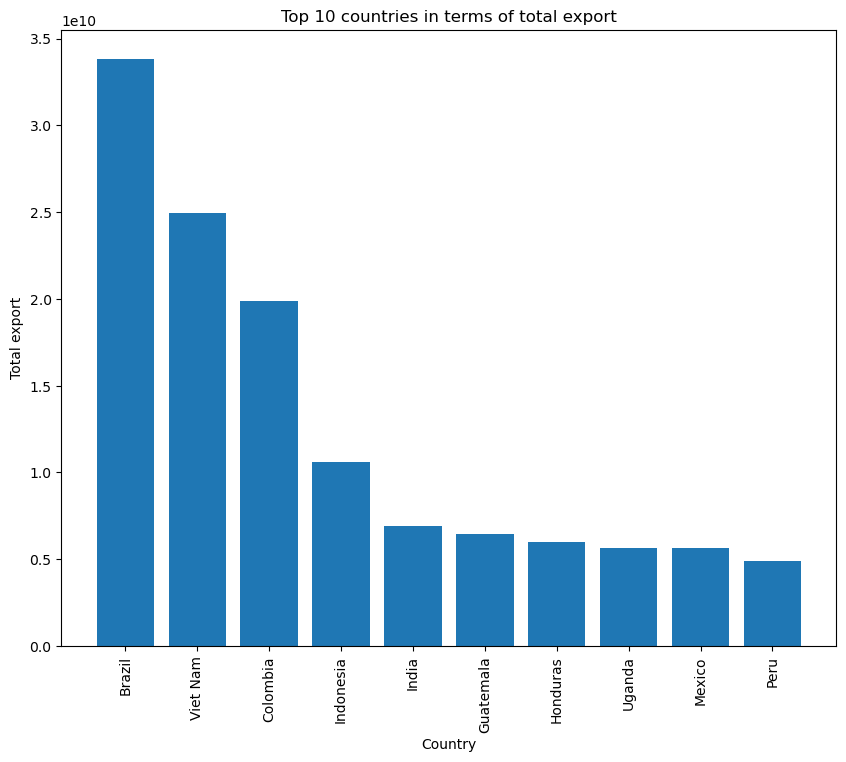

In [146]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.bar(top_export['Country'],top_export['Total_export'],align =  'center')
plt.title('Top 10 countries in terms of total export')
plt.xlabel('Country')
plt.ylabel('Total export')

<font size = 3>**From this chart above we can see that the gap between the top four countries and the countries behind them is very large, so I will focus on the top four countries.**

<font size = 3>

In [147]:
top_export1 = coffee_export[['Country', 'Total_export']].sort_values(by=['Total_export'], ascending=False).head(4)
top_exportation = coffee_export[coffee_export.Country.isin(top_export1['Country'].unique())]
top_exportation = top_exportation.T
top_exportation.drop(['Country', 'Total_export'], axis=0, inplace=True)
top_exportation.index.name = 'Year'
top_exportation.columns = top_export1['Country'].values
top_exportation['Brazil'] = abs(top_exportation['Brazil'])
top_exportation.head(5)

,Brazil,Viet Nam,Colombia,Indonesia
Year,,,,
1990,1016160000,836640000,414180000,68700000
1991,1270980000,755940000,370260000,72060000
1992,1127460000,993840000,276240000,116280000
1993,1070280000,814080000,339720000,124320000
1994,1036380000,706080000,276300000,163260000


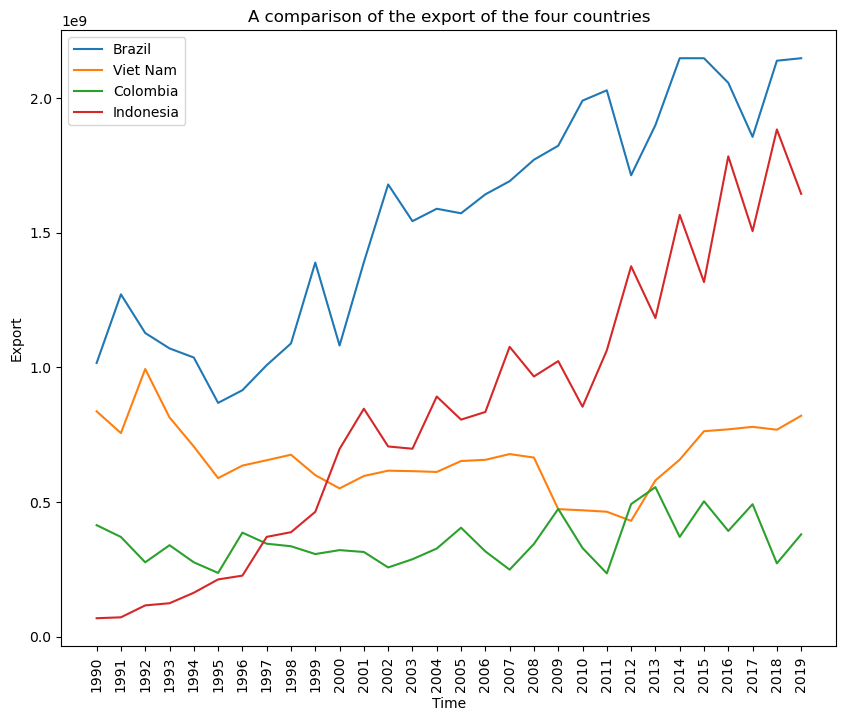

In [150]:
brazil = top_exportation['Brazil']
vietnam = top_exportation['Viet Nam']
colombia = top_exportation['Colombia']
indonesia = top_exportation['Indonesia']

fig,ax = plt.subplots()


plt.xticks(rotation = 90)
ax.plot(brazil, label = 'Brazil')
ax.plot(vietnam, label = 'Viet Nam')
ax.plot(colombia, label = 'Colombia')
ax.plot(indonesia, label = 'Indonesia')

ax.set_title('A comparison of the export of the four countries')
ax.set_xlabel('Time')
ax.set_ylabel('Export')
ax.legend()

<font size=3>**Note that: We can see that since 1999 Indonesia's exports have far exceeded South, which is in conflict with total exports and total production. This contradiction can be because of faulty imformation from the website or error by Author.**

# **Analysis of import**

## Import dataset basic information

In [151]:
coffee_import.head(5)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000


In [152]:
coffee_import.shape

(35, 32)

In [93]:
coffee_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       35 non-null     object
 1   1990          35 non-null     int64 
 2   1991          35 non-null     int64 
 3   1992          35 non-null     int64 
 4   1993          35 non-null     int64 
 5   1994          35 non-null     int64 
 6   1995          35 non-null     int64 
 7   1996          35 non-null     int64 
 8   1997          35 non-null     int64 
 9   1998          35 non-null     int64 
 10  1999          35 non-null     int64 
 11  2000          35 non-null     int64 
 12  2001          35 non-null     int64 
 13  2002          35 non-null     int64 
 14  2003          35 non-null     int64 
 15  2004          35 non-null     int64 
 16  2005          35 non-null     int64 
 17  2006          35 non-null     int64 
 18  2007          35 non-null     int64 
 19  2008      

In [153]:
coffee_import.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
count,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,...,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,1.270834e+08,1.221943e+08,1.357989e+08,1.322023e+08,1.286126e+08,1.240646e+08,1.334674e+08,1.389651e+08,1.418863e+08,1.464549e+08,...,1.916794e+08,1.940109e+08,1.987337e+08,2.057606e+08,2.080800e+08,2.187960e+08,2.161097e+08,2.227629e+08,2.313326e+08,5.069693e+09
std,2.543488e+08,2.435393e+08,2.690354e+08,2.424808e+08,2.178530e+08,2.188911e+08,2.415144e+08,2.500391e+08,2.548447e+08,2.715283e+08,...,3.363666e+08,3.404099e+08,3.453368e+08,3.539295e+08,3.511787e+08,3.667628e+08,3.684394e+08,3.678250e+08,3.854538e+08,8.850559e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.970000e+07
25%,6.300000e+05,4.800000e+05,6.180000e+06,7.890000e+06,8.880000e+06,8.550000e+06,9.750000e+06,1.074000e+07,1.077000e+07,1.176000e+07,...,2.151000e+07,2.163000e+07,2.373000e+07,2.499000e+07,2.595000e+07,2.835000e+07,2.613000e+07,2.937000e+07,2.946000e+07,5.573100e+08
50%,3.444000e+07,3.150000e+07,3.618000e+07,4.008000e+07,4.626000e+07,3.798000e+07,4.458000e+07,4.362000e+07,4.572000e+07,4.740000e+07,...,5.712000e+07,6.456000e+07,6.378000e+07,6.360000e+07,6.264000e+07,6.804000e+07,6.564000e+07,6.960000e+07,7.320000e+07,1.640040e+09
75%,1.168500e+08,1.141200e+08,1.210200e+08,1.169700e+08,1.246500e+08,1.251600e+08,1.335000e+08,1.439100e+08,1.546500e+08,1.491000e+08,...,2.276100e+08,2.300700e+08,2.283900e+08,2.500500e+08,2.665800e+08,2.949900e+08,3.017100e+08,3.242400e+08,3.272400e+08,5.841240e+09
max,1.260420e+09,1.190400e+09,1.376340e+09,1.159740e+09,9.702600e+08,1.026420e+09,1.166700e+09,1.220580e+09,1.261800e+09,1.364760e+09,...,1.565580e+09,1.563360e+09,1.620960e+09,1.653900e+09,1.662480e+09,1.730280e+09,1.769280e+09,1.735080e+09,1.851240e+09,4.250766e+10


## **Top ten countries in terms of imports**

In [154]:
top_import = coffee_import[['Country', 'Total_import']].sort_values(by=['Total_import'], ascending=False).head(10)
top_import.head(10)

,Country,Total_import
34,United States of America,42507660000
11,Germany,31481400000
15,Italy,13272120000
28,Japan,12422760000
10,France,11972520000
26,Spain,7840620000
33,United Kingdom,6731460000
1,Belgium,6240540000
20,Netherlands,5951400000
30,Russian Federation,5731080000


Text(0, 0.5, 'Total import')

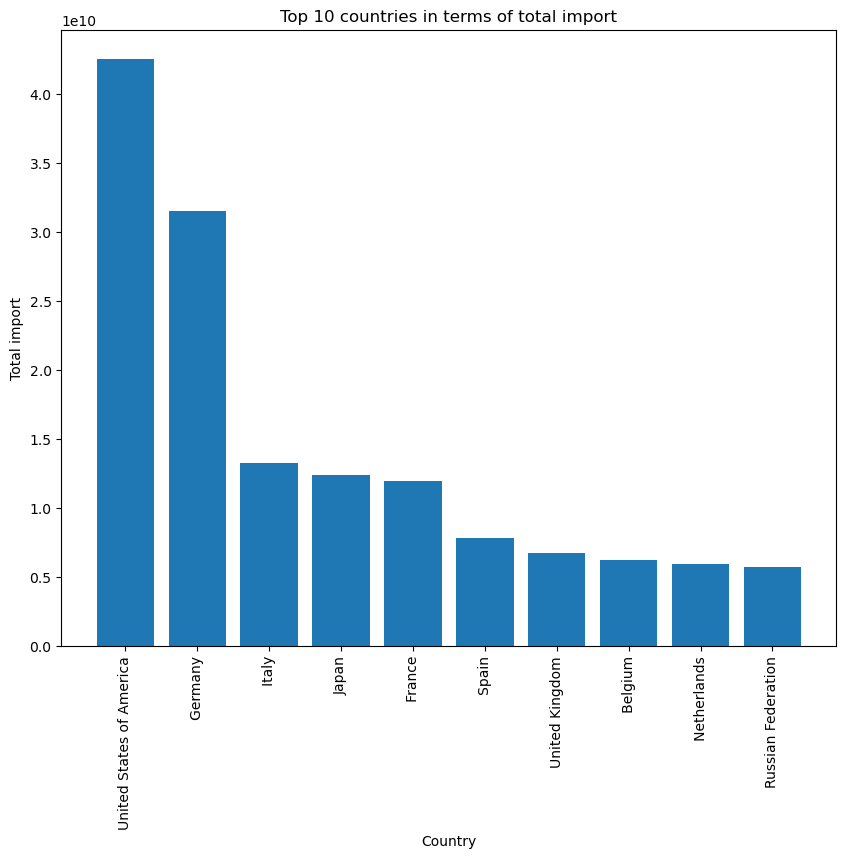

In [155]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.bar(top_import['Country'],top_import['Total_import'],align =  'center')
plt.title('Top 10 countries in terms of total import')
plt.xlabel('Country')
plt.ylabel('Total import')

<font size = 3>**From this chart above we can see that the gap between the top two countries and the countries behind them is very large, so I will focus on the top two countries.**

In [156]:
top_import1 = coffee_import[['Country', 'Total_import']].sort_values(by=['Total_import'], ascending=False).head(2)
top_importers = coffee_import[coffee_import.Country.isin(top_import1['Country'].unique())]
# top_importers.head()
top_importers = top_importers.T
top_importers.drop(['Country', 'Total_import'], axis=0, inplace=True)
top_importers.index.name = 'Year'
top_importers.columns = top_import1['Country'].values
top_importers.head()

,United States of America,Germany
Year,,
1990,820260000,1260420000
1991,793740000,1190400000
1992,827340000,1376340000
1993,846420000,1159740000
1994,814980000,970260000


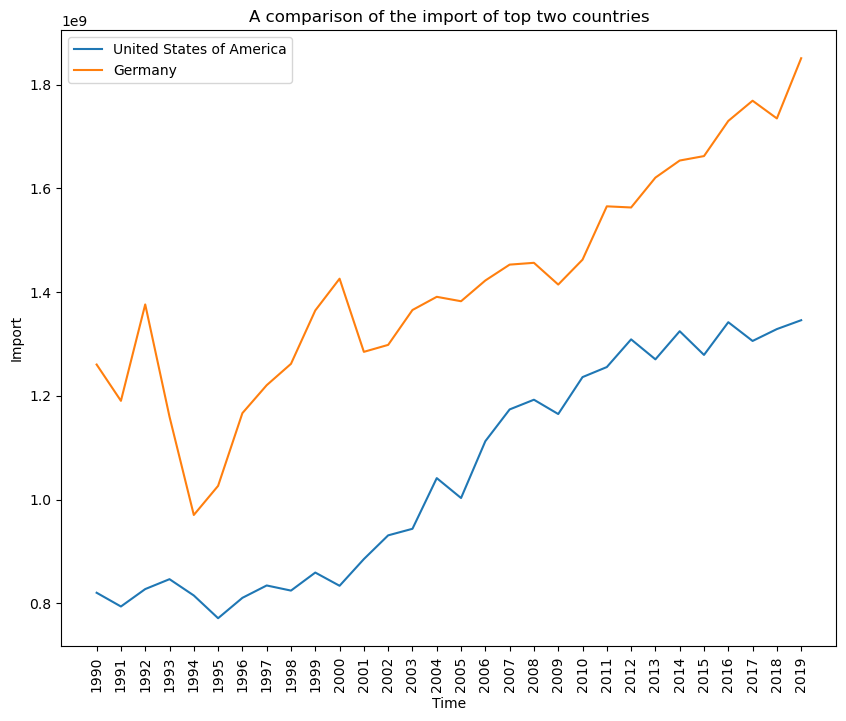

In [157]:
USA = top_importers['United States of America']
Germany = top_importers['   Germany']


fig,ax = plt.subplots()


plt.xticks(rotation = 90)
ax.plot(USA, label = 'United States of America')
ax.plot(Germany, label = 'Germany')

ax.set_title('A comparison of the import of top two countries')
ax.set_xlabel('Time')
ax.set_ylabel('Import')
ax.legend()

<font size=3>**Note that: Here we can see from the graph is that Germany is the top country in importing the Coffee but in total USA is the top coffee importer. This contradiction can be because of faulty imformation from the website or error by Author.**

# Conclusion

<font size = 3>**From this analysis, we find the following points. <br> 
    <br>
First, Brazil is the most Coffee Producing, Consuming and Exporting Country. <br>
Second, United States of America is the most Coffee Importing country. <br>
Third, there are conflicting findings in some parts of these data, so further corrections may be needed.**
 